Here we will use the TF Agents to train the CartPole environment with DQN.
TF Agents package makes the implementation of RL algo easier.

In [1]:
import tensorflow as tf
from tf_agents.environments import suite_gym

In [2]:
env = suite_gym.load("CartPole-v1")

In [3]:
env

In [4]:
env.gym

<TimeLimit<OrderEnforcing<CartPoleEnv<CartPole-v1>>>>

In [5]:
env.reset()

TimeStep(
{'step_type': array(0),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.00938285, -0.02642902,  0.03463222, -0.0304736 ], dtype=float32)})

In [6]:
env.step(0)

TimeStep(
{'step_type': array(1),
 'reward': array(1., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.00885427, -0.22203006,  0.03402275,  0.27293187], dtype=float32)})

Explore Environment Specification

In [7]:
env.observation_spec()

BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])

In [8]:
env.action_spec()

BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=1)

In [9]:
env.time_step_spec()

TimeStep(
{'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type'),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])})

In [10]:
env.reward_spec()

ArraySpec(shape=(), dtype=dtype('float32'), name='reward')

In [11]:
env.discount_spec()

BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0)

In [12]:
env.current_time_step()

TimeStep(
{'step_type': array(1),
 'reward': array(1., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.00885427, -0.22203006,  0.03402275,  0.27293187], dtype=float32)})

Wrap the environment with TFPyEnvironment which supports both py and tf environments.

In [13]:
from tf_agents.environments.tf_py_environment import TFPyEnvironment

In [14]:
env = TFPyEnvironment(env)

In [15]:
env

In [16]:
env.reset()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 0.01941166,  0.04063222, -0.04695464, -0.01227651]],
      dtype=float32)>})

In [17]:
env.step(0)

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 0.0202243 , -0.15378599, -0.04720017,  0.2652298 ]],
      dtype=float32)>})

In [18]:
env.observation_spec()

BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32))

In [19]:
env.action_spec()

BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0, dtype=int64), maximum=array(1, dtype=int64))

In [20]:
env.time_step_spec()

TimeStep(
{'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32))})

In [21]:
env.reward_spec()

TensorSpec(shape=(), dtype=tf.float32, name='reward')

In [22]:
env.discount_spec()

BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0)

In [23]:
env.current_time_step()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 0.0202243 , -0.15378599, -0.04720017,  0.2652298 ]],
      dtype=float32)>})

Create a Deep Q Network

In [24]:
from tf_agents.networks.q_network import QNetwork

In [25]:
help(QNetwork)

Help on class QNetwork in module tf_agents.networks.q_network:

class QNetwork(tf_agents.networks.network.Network)
 |  QNetwork(input_tensor_spec, action_spec, preprocessing_layers=None, preprocessing_combiner=None, conv_layer_params=None, fc_layer_params=(75, 40), dropout_layer_params=None, activation_fn=<function relu at 0x000001FACB331120>, kernel_initializer=None, batch_squash=True, dtype=tf.float32, q_layer_activation_fn=None, name='QNetwork')
 |  
 |  Feed Forward network.
 |  
 |  Method resolution order:
 |      QNetwork
 |      tf_agents.networks.network.Network
 |      keras.src.engine.base_layer.Layer
 |      tensorflow.python.module.module.Module
 |      tensorflow.python.trackable.autotrackable.AutoTrackable
 |      tensorflow.python.trackable.base.Trackable
 |      keras.src.utils.version_utils.LayerVersionSelector
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_tensor_spec, action_spec, preprocessing_layers=None, preprocessing_combine

In [26]:
q_net = QNetwork(env.observation_spec(), env.action_spec())

Create a DQN agent

In [27]:
from tf_agents.agents.dqn.dqn_agent import DqnAgent
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tf_agents.utils import common

In [28]:
help(DqnAgent)

Help on class DqnAgent in module tf_agents.agents.dqn.dqn_agent:

class DqnAgent(tf_agents.agents.tf_agent.TFAgent)
 |  DqnAgent(time_step_spec: tf_agents.trajectories.time_step.TimeStep, action_spec: Union[tensorflow.python.framework.type_spec.TypeSpec, tensorflow.python.framework.tensor.TensorSpec, tensorflow.python.ops.ragged.ragged_tensor.RaggedTensorSpec, tensorflow.python.framework.sparse_tensor.SparseTensorSpec, ForwardRef('tf_agents.distributions.utils.DistributionSpecV2'), Iterable[ForwardRef('NestedTensorSpec')], Mapping[str, ForwardRef('NestedTensorSpec')]], q_network: tf_agents.networks.network.Network, optimizer: Union[keras.src.optimizers.optimizer.Optimizer, tensorflow.python.training.optimizer.Optimizer], observation_and_action_constraint_splitter: Optional[Callable[[Union[tensorflow.python.framework.type_spec.TypeSpec, tensorflow.python.framework.tensor.TensorSpec, tensorflow.python.ops.ragged.ragged_tensor.RaggedTensorSpec, tensorflow.python.framework.sparse_tensor.Sp

In [29]:
optimizer = Adam(learning_rate=0.001)
loss = MeanSquaredError('none', 'mean_squared_error')
loss_fn = loss.call
discount_factor = 0.95
epsilon_fn = PolynomialDecay(
    initial_learning_rate=1.0,
    decay_steps=1000,
    end_learning_rate=0.01,
    power=1
    )
target_model_update = 50
train_step = tf.Variable(0)

agent = DqnAgent(
    env.time_step_spec(),
    env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    gamma=discount_factor,
    td_errors_loss_fn=common.element_wise_squared_loss,
    epsilon_greedy=lambda:epsilon_fn(train_step),
    train_step_counter=train_step,
    target_update_period=target_model_update,
)

In [30]:
env.time_step_spec()

TimeStep(
{'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32))})

In [31]:
agent.initialize()

Create a Replay Buffer to store experiences

In [32]:
from tf_agents.replay_buffers.tf_uniform_replay_buffer import TFUniformReplayBuffer

In [33]:
agent.collect_data_spec

Trajectory(
{'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)),
 'action': BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0, dtype=int64), maximum=array(1, dtype=int64)),
 'policy_info': (),
 'next_step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32))})

In [34]:
replay_buffer = TFUniformReplayBuffer(
    data_spec= agent.collect_data_spec,
    batch_size= env.batch_size,
    max_length= 10000
)

Create an observer to write into the replay buffer

In [35]:
replay_buffer_observer = replay_buffer.add_batch

In [36]:
replay_buffer

In [37]:
replay_buffer_observer

<bound method ReplayBuffer.add_batch of <tf_agents.replay_buffers.tf_uniform_replay_buffer.TFUniformReplayBuffer object at 0x000001FACF5C6C10>>

Create a Driver that explores environment using a given policy, collects experience and broadcast them to observer.

In [38]:
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver
from tf_agents.metrics import tf_metrics

In [39]:
train_metrics = [
    tf_metrics.AverageReturnMetric()
]

In [40]:
collect_driver = DynamicStepDriver(
    env=env,
    policy= agent.collect_policy,
    observers= [replay_buffer_observer] + train_metrics,
    num_steps=100
)

In [41]:
train_metrics[0].result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

Create a driver to just fill the replay buffer with some experiences with a random policy

In [42]:
from tf_agents.policies.random_tf_policy import RandomTFPolicy

In [43]:
initial_collect_policy = RandomTFPolicy(env.time_step_spec(), env.action_spec())

In [44]:
initial_collect_policy

In [45]:
initial_driver = DynamicStepDriver(
    env,
    initial_collect_policy,
    [replay_buffer_observer],
    num_steps=1000
)

In [46]:
final_time_step, final_policy_state = initial_driver.run()

In [47]:
final_time_step

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.02465292, -1.0258754 ,  0.11786823,  1.5893848 ]],
      dtype=float32)>})

In [48]:
final_policy_state

()

Create a Dataset of sample a batch of trajectories for agent to train.

In [49]:
from tf_agents.trajectories.trajectory import to_transition

In [50]:
trajectories, buffer_info = replay_buffer.get_next(sample_batch_size=2, num_steps=3)

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


In [51]:
trajectories

Trajectory(
{'step_type': <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 2],
       [1, 1, 1]])>,
 'observation': <tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[-0.07259054, -0.6232152 ,  0.170022  ,  1.1400421 ],
        [-0.08505484, -0.4306737 ,  0.19282284,  0.9051402 ],
        [-0.09366832, -0.23861197,  0.21092565,  0.678726  ]],

       [[-0.01045731,  1.1301863 , -0.09057271, -1.8127806 ],
        [ 0.01214642,  1.3261927 , -0.12682833, -2.132177  ],
        [ 0.03867028,  1.5223236 , -0.16947187, -2.461198  ]]],
      dtype=float32)>,
 'action': <tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[1, 1, 0],
       [1, 1, 0]], dtype=int64)>,
 'policy_info': (),
 'next_step_type': <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 0],
       [1, 1, 2]])>,
 'reward': <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 0.],
       [1., 1., 1.]], dtype=float32)>,
 'discount': <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1.

In [52]:
buffer_info

BufferInfo(ids=<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[255, 256, 257],
       [ 43,  44,  45]], dtype=int64)>, probabilities=<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.00095785, 0.00095785], dtype=float32)>)

In [53]:
time_steps, action_steps, next_time_steps = to_transition(trajectories)

In [54]:
time_steps

TimeStep(
{'step_type': <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1]])>,
 'reward': <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>,
 'discount': <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>,
 'observation': <tf.Tensor: shape=(2, 2, 4), dtype=float32, numpy=
array([[[-0.07259054, -0.6232152 ,  0.170022  ,  1.1400421 ],
        [-0.08505484, -0.4306737 ,  0.19282284,  0.9051402 ]],

       [[-0.01045731,  1.1301863 , -0.09057271, -1.8127806 ],
        [ 0.01214642,  1.3261927 , -0.12682833, -2.132177  ]]],
      dtype=float32)>})

In [55]:
action_steps

PolicyStep(action=<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[1, 1],
       [1, 1]], dtype=int64)>, state=(), info=())

In [56]:
dataset = replay_buffer.as_dataset(
    sample_batch_size=64,
    num_steps=2,
)

In [57]:
dataset

<_MapDataset element_spec=(Trajectory(
{'step_type': TensorSpec(shape=(64, 2), dtype=tf.int32, name=None),
 'observation': TensorSpec(shape=(64, 2, 4), dtype=tf.float32, name=None),
 'action': TensorSpec(shape=(64, 2), dtype=tf.int64, name=None),
 'policy_info': (),
 'next_step_type': TensorSpec(shape=(64, 2), dtype=tf.int32, name=None),
 'reward': TensorSpec(shape=(64, 2), dtype=tf.float32, name=None),
 'discount': TensorSpec(shape=(64, 2), dtype=tf.float32, name=None)}), BufferInfo(ids=TensorSpec(shape=(64, 2), dtype=tf.int64, name=None), probabilities=TensorSpec(shape=(64,), dtype=tf.float32, name=None)))>

In [58]:
it = iter(dataset)

In [59]:
it

In [60]:
next(it)

(Trajectory(
 {'step_type': <tf.Tensor: shape=(64, 2), dtype=int32, numpy=
 array([[0, 1],
        [1, 1],
        [1, 1],
        [1, 2],
        [1, 1],
        [0, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 2],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [2, 0],
        [1, 1],
        [0, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 1],
        [1, 1],
        [2, 0],
        [1, 1],
        [1, 1],
        [0, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [0, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [2, 0],
        [1, 1],
        [0, 1],
        [1, 2],
        [1, 1],
        [1, 1

In [61]:
next(it)[0]

Trajectory(
{'step_type': <tf.Tensor: shape=(64, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 2],
       [1, 1],
       [1, 1],
       [1, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [2, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 0],
       [2, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1

Create a training loop

In [62]:
from tf_agents.utils.common import function

In [63]:
collect_driver.run

<bound method DynamicStepDriver.run of <tf_agents.drivers.dynamic_step_driver.DynamicStepDriver object at 0x000001FACDB3FC50>>

In [64]:
agent.train

<bound method TFAgent.train of <tf_agents.agents.dqn.dqn_agent.DqnAgent object at 0x000001FACE471BD0>>

In [65]:
collect_driver.run = function(collect_driver.run)
agent.train = function(agent.train)

In [66]:
collect_driver.run

In [67]:
agent.train

In [68]:
agent.collect_policy.get_initial_state(env.batch_size)

()

In [69]:
collect_driver.run(None, ())

(TimeStep(
 {'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>,
  'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
  'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
  'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
 array([[ 0.02920513,  0.06443676, -0.1674954 , -0.6228573 ]],
       dtype=float32)>}),
 ())

In [70]:
ts, ps = collect_driver.run(None,())

In [71]:
trajectories, buffer_info = next(it)

In [72]:
trajectories

Trajectory(
{'step_type': <tf.Tensor: shape=(64, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [2, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1

In [73]:
agent.training_data_spec

Trajectory(
{'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
      dtype=float32)),
 'action': BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0, dtype=int64), maximum=array(1, dtype=int64)),
 'policy_info': (),
 'next_step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32))})

In [74]:
agent.train_sequence_length

2

In [75]:
agent.train(trajectories)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


LossInfo(loss=<tf.Tensor: shape=(), dtype=float32, numpy=1.0772214>, extra=DqnLossInfo(td_loss=<tf.Tensor: shape=(64,), dtype=float32, numpy=
array([1.0102874, 1.000267 , 1.1176362, 1.0181779, 1.0991364, 0.       ,
       1.0637406, 1.4008298, 1.0881807, 1.1015971, 1.0964787, 1.1713035,
       1.0485126, 1.0600985, 1.2188026, 1.1931905, 1.0958183, 1.0969179,
       1.171158 , 1.0884794, 1.2536561, 1.1034644, 1.0999069, 1.0207505,
       1.0325279, 1.0635626, 1.136952 , 1.0664694, 1.0692486, 1.0310467,
       1.1713035, 1.0987087, 1.0697533, 1.0073216, 1.0959064, 1.1021773,
       1.1008652, 1.1000414, 1.0207505, 1.3764472, 1.0294132, 1.1020159,
       1.0094546, 1.0934191, 1.0073463, 1.107274 , 1.0642033, 1.023926 ,
       1.0890372, 1.2064425, 1.0156872, 1.0089902, 1.0113282, 1.1757089,
       1.0110266, 1.0976887, 1.1455642, 1.0156358, 1.2536561, 1.0596786,
       1.0551097, 1.1017693, 1.0842642, 1.012057 ], dtype=float32)>, td_error=<tf.Tensor: shape=(64,), dtype=float32, numpy=
arr

In [76]:
def compute_avg_return(environment, policy, num_episodes=10):

    total_return = 0.0
    for _ in range(num_episodes):

        time_step = environment.reset()
        episode_return = 0.0

        while not time_step.is_last():
            action_step = policy.action(time_step)
            time_step = environment.step(action_step.action)
            episode_return += time_step.reward
        total_return += episode_return

        avg_return = total_return / num_episodes
        return avg_return.numpy()[0]

In [77]:
eval_env = suite_gym.load('CartPole-v1')
eval_env = TFPyEnvironment(eval_env)

In [78]:
def train_agent(n_iteration):
    losses = []
    avg_returns = []
    train_step.assign(0)
    time_step = None
    policy_state = agent.collect_policy.get_initial_state(env.batch_size)
    iterator = iter(dataset)

    for iteration in range(n_iteration):
        time_step, policy_state = collect_driver.run(time_step, policy_state)
        trajectories, buffer_info = next(iterator)
        train_loss = agent.train(trajectories)
        loss = train_loss.loss.numpy()
        avg_return = train_metrics[0].result().numpy()
        losses.append(loss)
        avg_returns.append(avg_return)
        if train_step%100 == 0:
            
            print(f'train step: {train_step.value()}      loss: {loss}     avg_return: {avg_return}     customreturn: {compute_avg_return(eval_env, agent.policy)}')

    return losses, avg_returns
        

In [79]:
losses, avg_returns = train_agent(100000)

train step: 100      loss: 1.1937060356140137     avg_return: 20.700000762939453     customreturn: 1.0
train step: 200      loss: 1.613093614578247     avg_return: 13.5     customreturn: 1.0
train step: 300      loss: 1.552215337753296     avg_return: 13.699999809265137     customreturn: 0.8999999761581421
train step: 400      loss: 0.9064115285873413     avg_return: 18.299999237060547     customreturn: 1.0
train step: 500      loss: 1.3020970821380615     avg_return: 23.799999237060547     customreturn: 2.799999952316284
train step: 600      loss: 0.4367882013320923     avg_return: 143.89999389648438     customreturn: 10.300000190734863
train step: 700      loss: 0.3084270656108856     avg_return: 132.89999389648438     customreturn: 15.5
train step: 800      loss: 0.25025248527526855     avg_return: 146.8000030517578     customreturn: 15.699999809265137
train step: 900      loss: 0.17003373801708221     avg_return: 208.8000030517578     customreturn: 43.099998474121094
train step: 10

: 

Visualizing results

In [79]:
import pandas as pd

In [1]:
pd.DataFrame({'returns': avg_returns}).plot()

NameError: name 'pd' is not defined

<Axes: >

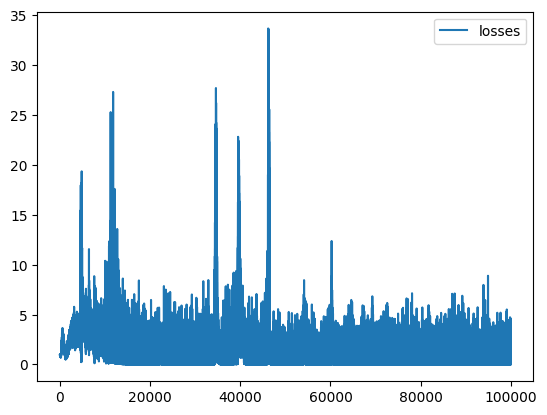

In [81]:
pd.DataFrame({'losses': losses}).plot()

Create a evaluation environment to test policy

In [82]:
eval_py_env = suite_gym.load('CartPole-v1')

In [83]:
eval_tf_env = TFPyEnvironment(eval_py_env)

In [84]:
eval_py_env.reset()

TimeStep(
{'step_type': array(0),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([-0.02632038, -0.04539856,  0.02695911, -0.0459032 ], dtype=float32)})

In [85]:
eval_tf_env.reset()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.04607582,  0.02035571,  0.02588396,  0.04543513]],
      dtype=float32)>})

In [86]:
eval_py_env.current_time_step()

TimeStep(
{'step_type': array(0),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([-0.04607582,  0.02035571,  0.02588396,  0.04543513], dtype=float32)})

In [87]:
eval_tf_env.current_time_step()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.04607582,  0.02035571,  0.02588396,  0.04543513]],
      dtype=float32)>})

In [88]:
eval_tf_env.close()

In [89]:
eval_tf_env.current_time_step()

TimeStep(
{'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0])>,
 'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 'observation': <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.04607582,  0.02035571,  0.02588396,  0.04543513]],
      dtype=float32)>})

In [90]:
eval_py_env.close()

In [91]:
eval_py_env.current_time_step()

TimeStep(
{'step_type': array(0),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([-0.04607582,  0.02035571,  0.02588396,  0.04543513], dtype=float32)})

In [92]:
policy = agent.policy

In [93]:
policy

In [94]:
policy.__dict__

{'_name': 'greedy_policy',
 '_name_scope': <tensorflow.python.framework.ops.name_scope_v2 at 0x15c24baf280>,
 '_time_step_spec': TimeStep(
 {'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
  'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
  'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32)),
  'observation': BoundedTensorSpec(shape=(4,), dtype=tf.float32, name='observation', minimum=array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
       dtype=float32), maximum=array([4.8000002e+00, 3.4028235e+38, 4.1887903e-01, 3.4028235e+38],
       dtype=float32))}),
 '_action_spec': BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0, dtype=int64), maximum=array(1, dtype=int64)),
 '_policy_state_spec': (),
 '_emit_log_probability': False,
 '_validate_args': True,
 '_info_spec': (),
 '_policy_step_spec': PolicyStep(action=Boun

In [95]:
policy.action(eval_tf_env.current_time_step())

PolicyStep(action=<tf.Tensor: shape=(1,), dtype=int64, numpy=array([1], dtype=int64)>, state=(), info=())

In [96]:
policy.wrapped_policy.__dict__

{'_flat_action_spec': BoundedTensorSpec(shape=(), dtype=tf.int64, name='action', minimum=array(0, dtype=int64), maximum=array(1, dtype=int64)),
 '_self_setattr_tracking': True,
 '_self_unconditional_checkpoint_dependencies': [TrackableReference(name=_q_network, ref=<tf_agents.networks.q_network.QNetwork object at 0x0000015C2328CF90>)],
 '_self_unconditional_dependency_names': {'_q_network': <tf_agents.networks.q_network.QNetwork at 0x15c2328cf90>},
 '_self_unconditional_deferred_dependencies': {},
 '_self_update_uid': -1,
 '_self_name_based_restores': set(),
 '_self_saveable_object_factories': {},
 '_q_network': <tf_agents.networks.q_network.QNetwork at 0x15c2328cf90>,
 '_name': 'q_policy',
 '_name_scope': <tensorflow.python.framework.ops.name_scope_v2 at 0x15c24baeb30>,
 '_time_step_spec': TimeStep(
 {'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
  'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
  'discount': BoundedTensorSpec(shape=(), dtype=tf

In [97]:
for _ in range(5):
    time_step = eval_tf_env.reset()

    while not time_step.is_last():
        time_step = eval_tf_env.step(policy.action(time_step))
        eval_py_env.render(mode='human')

eval_py_env.close()

In [95]:
eval_py_env.close()

Save a trained agent policy to be used in another program

In [98]:
from tf_agents.policies.policy_saver import PolicySaver

In [117]:
policy_saver = PolicySaver(policy= initial_collect_policy, batch_size=None)

TypeError: this __dict__ descriptor does not support '_DictWrapper' objects